<a href="https://colab.research.google.com/github/programming-debug/Python/blob/main/Hill_climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hill climbing**

In [1]:
import math
class Node:
  def __init__ (self, state, parent, actions, totalCost, heuristic): 
    self.state = state
    self.parent = parent
    self.actions = actions
    self.totalCost = totalCost
    self.heuristic = heuristic

The line you provided calculates the Euclidean distance between the heuristic coordinates of the goal state and the initial state. It is used to estimate the cost from the initial state to the goal state.

The formula used is the Euclidean distance formula in 2D space:
distance = sqrt((x2 - x1)^2 + (y2 - y1)^2)

By using this distance as the initial cost, the algorithm aims to minimize the cost and find a path that reduces the distance between the current state and the goal state.

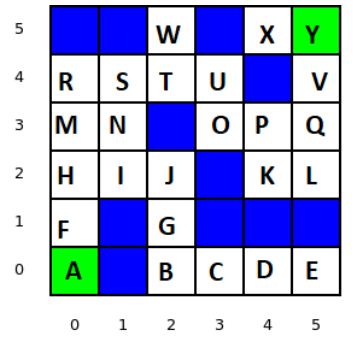

In [2]:
def hillClimbing():  
                      # name, parent, actions, cost, heuristic
  graph = {'A': Node('A', None, [('F',1)], 0, (0,0)), 
         'B': Node('B', None, [('G',1), ('C',1)], 0, (2,0)),
         'C': Node('C', None, [('B',1), ('D',1)], 0, (3,0)), 
         'D': Node ('D', None, [('C',1), ('E',1)], 0, (4,0)), 
         'E': Node('E', None, [('D',1)], 0, (5,0)),
         'F': Node('F', None, [('A',1), ('H',1)], 0, (0,1)), 
         'G': Node('G', None, [('B',1), ('J',1)], 0, (2,1)), 
         'H': Node('H', None, [('F',1), ('I',1), ('M',1)], 0, (0,2)), 
         'I': Node('I', None, [('H',1), ('J',1), ('N',1)], 0, (1,2)), 
         'J': Node('J', None, [('G',1), ('I',1)], 0, (2,2)),
         'K': Node('K', None, [('L',1), ('P',1)], 0, (4,2)),
         'L': Node('L', None, [('K',1), ('Q',1)], 0, (5,2)),
         'M': Node('M', None, [('H',1), ('N',1), ('R',1)], 0, (0,3)),
         'N': Node('N', None, [('I',1), ('M',1), ('S',1)], 0, (1,3)),
         'O': Node('0', None, [('P',1), ('U',1)], 0, (3,3)),
         'P': Node('P', None, [('0',1), ('Q',1)], 0, (4,3)),
         'Q': Node('Q', None, [('L',1), ('P',1), ('V',1)], 0, (5,3)),
         'R': Node('R', None, [('M',1), ('S',1)], 0, (0,4)),
         'S': Node('S', None, [('N',1), ('R',1), ('T',1)], 0, (1,4)),
         'T': Node('T', None, [('S',1), ('U',1), ('W',1)], 0, (2,4)),
         'U': Node('U', None, [('0',1), ('T',1)], 0, (3,4)),
         'V': Node('V', None, [('Q',1), ('Y',1)], 0, (5,4)),
         'W': Node('W', None, [('T',1)], 0, (2,5)),
         'X': Node('X', None, [('Y',1)], 0, (4,5)),
         'Y': Node('Y', None, [('V',1), ('X',1)], 0, (5,5))}

  initialState = 'A'
  goalState = 'Y'
  parentNode=initialState
  parentCost = math.sqrt((graph[goalState].heuristic[0] - \
                          graph[initialState].heuristic[0])**2+\
                      (graph [goalState].heuristic[1] - \
                       graph[initialState].heuristic[1])**2)
  explored=[]
  solution=[]
  s = parentCost - 1
  while parentNode!=goalState: 
    bestNode=parentNode 
    minChildCost=parentCost 
    explored.append(parentNode)
    for child in graph [parentNode].actions:
      if child[0] not in explored:
        childCost = math.sqrt((graph[goalState].heuristic[0]- graph[child[0]].heuristic[0])**2+(graph[goalState].heuristic[1]- graph[child[0]].heuristic[1])**2)
        if childCost<minChildCost:
          bestNode=child[0]
          minChildCost=childCost
    if bestNode==parentNode:
      break
    else:
      parentNode=bestNode
      parentCost=minChildCost
      solution.append(parentNode)
  return solution
solution = hillClimbing() 
print(solution) 

['F', 'H', 'I', 'J']


The code implements the Hill Climbing algorithm to search for a path from the initial state to the goal state in a graph. Here's a breakdown of how the algorithm works:

1. The algorithm continues searching while the current node (`parentNode`) is not equal to the goal state.

2. The current node is initially considered the best node.

3. The minimum child cost is set to the current parent cost.

4. The current node is added to the list of explored nodes.

5. For each child of the current node, if the child has not been explored:

   - The Euclidean distance (childCost) between the child node and the goal state is calculated using their heuristic coordinates.
   
   - If the childCost is less than the current minimum child cost, the child node becomes the new best node, and the childCost becomes the new minimum child cost.
   
6. If the best node remains the same as the current node, it means no better child node was found, and the algorithm breaks out of the loop.

7. Otherwise, the best node becomes the new parent node, the parent cost is updated to the minimum child cost, and the best node is added to the solution list.

8. The loop continues until the goal state is reached, and the solution list is returned.

9. Finally, the solution list is printed.

Please note that this implementation of Hill Climbing is a basic version and might not always find the optimal path. It can get stuck in local optima and might not explore other promising paths. Consider using more advanced search algorithms like A* if you need to guarantee optimal solutions.

 a local optimum is a point where the objective function reaches an optimal value compared to its neighboring points but may not be the best possible value overall. It represents a situation where making small changes or moving to a nearby solution would not lead to any improvement